In [12]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

import os

In [16]:
image_path = r'D:\_DOCUMENTE_RARES\Desktop\ortho-vision\ai\resources\Panoramic Dental Xray Dataset-Automatixc tooth instance segmentation and identification\Panoramic Dental Xray Dataset'

In [39]:
import random


def analyze_images(image_folder):
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg'))]
    num_images = len(image_files)
    dimensions = []
    color_histograms = []

    print(f"Total images found: {num_images}")

    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        height, width, channels = image.shape
        dimensions.append((width, height))
        histogram = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        color_histograms.append(histogram)

    dimensions = np.array(dimensions)

    mean_width = np.mean(dimensions[:, 0])
    mean_height = np.mean(dimensions[:, 1])
    print(f"\nMean Dimensions: {mean_width:.2f} x {mean_height:.2f}")

    median_width = np.median(dimensions[:, 0])
    median_height = np.median(dimensions[:, 1])
    print(f"Median Dimensions: {median_width:.2f} x {median_height:.2f}")

    # Plot 5 random samples
    sampled_files = random.sample(image_files, min(10, num_images))
    plt.figure(figsize=(20, 8))
    for i, image_file in enumerate(sampled_files):
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: {image_file} is not a valid image.")
            continue
        plt.subplot(2, 5, i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(image_file)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Total images found: 107

Mean Dimensions: 2964.00 x 1464.00
Median Dimensions: 2964.00 x 1464.00


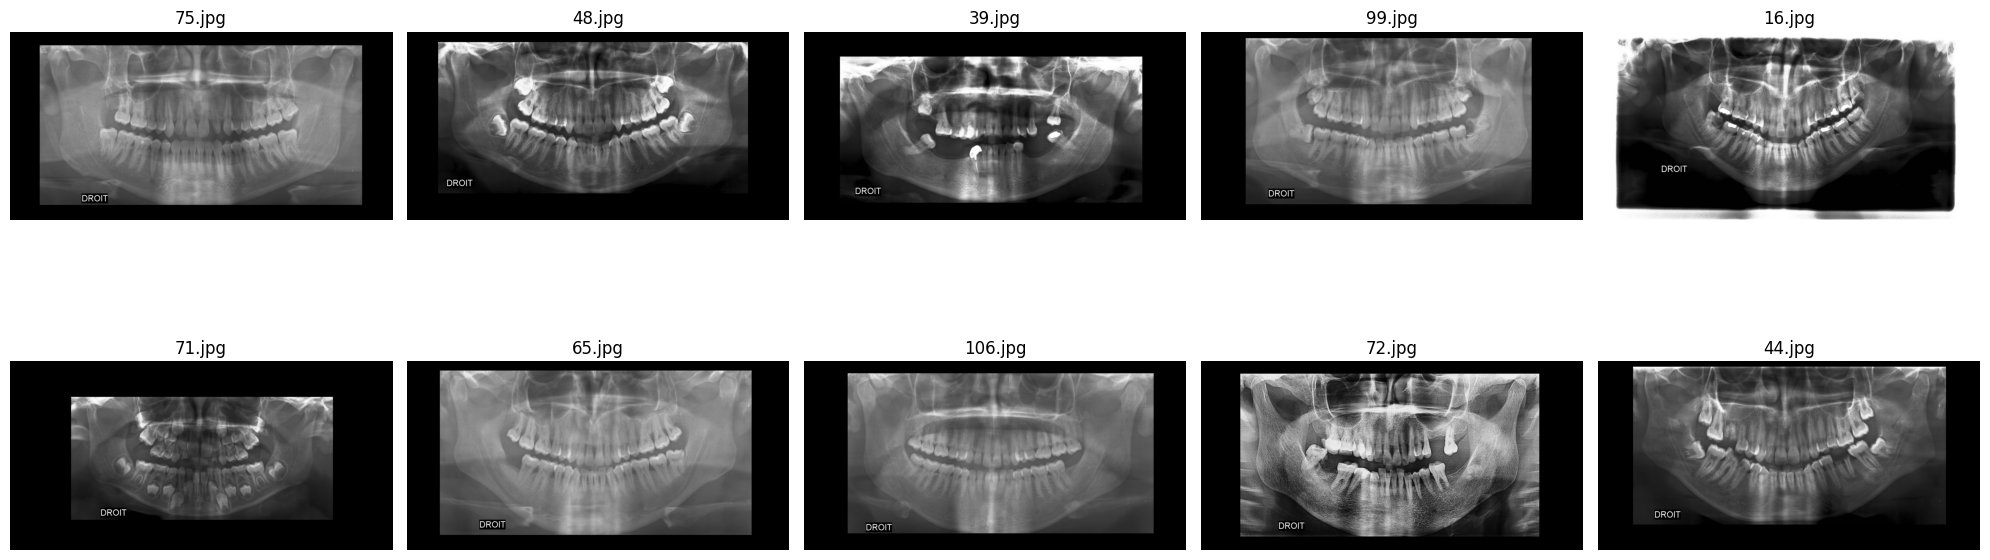

In [40]:
analyze_images(image_path)